In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/anurag.csv')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving anurag.csv to anurag (1).csv


In [5]:
# Importing the dataset
dataset = pd.read_csv('anurag.csv')

In [6]:
print(dataset)

        Surname  CreditScore Geography  ... IsActiveMember  EstimatedSalary  Exited
0      Hargrave          619    France  ...            1.0        101348.88       1
1          Hill          608     Spain  ...            1.0        112542.58       0
2          Onio          502    France  ...            0.0        113931.57       1
3          Boni          699    France  ...            0.0         93826.63       0
4      Mitchell          850     Spain  ...            1.0         79084.10       0
...         ...          ...       ...  ...            ...              ...     ...
4498   Obijiaku          771    France  ...            0.0         96270.64       0
4499  Johnstone          516    France  ...            1.0        101699.77       0
4500        Liu          709    France  ...            1.0         42085.58       1
4501  Sabbatini          772    France  ...            0.0         92888.52       1
4502     Walker          792    France  ...            0.0         38190.78 

In [7]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(4503, 11)


In [8]:
#Print Imformation about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          4503 non-null   object 
 1   CreditScore      4503 non-null   int64  
 2   Geography        4503 non-null   object 
 3   Gender           4498 non-null   object 
 4   Age              4497 non-null   float64
 5   Tenure           4500 non-null   float64
 6   Balance          4488 non-null   float64
 7   HasCrCard        4499 non-null   float64
 8   IsActiveMember   4501 non-null   float64
 9   EstimatedSalary  4494 non-null   float64
 10  Exited           4503 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 387.1+ KB


In [9]:
# Data type information
types = dataset.dtypes
print(types)

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [11]:
#Count total number of rank in Data
class_counts = dataset.groupby('Age').size()
print(class_counts)

Age
18.0    10
19.0     9
20.0    19
21.0    23
22.0    36
        ..
79.0     1
80.0     2
81.0     3
83.0     1
92.0     2
Length: 66, dtype: int64


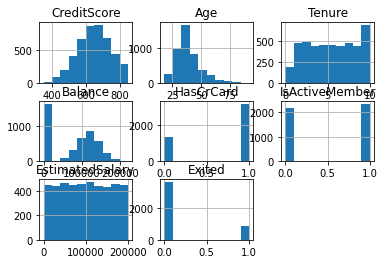

In [13]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

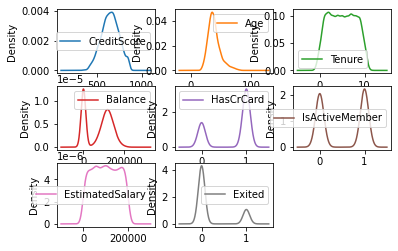

In [14]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [15]:
dataset.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              5
Age                 6
Tenure              3
Balance            15
HasCrCard           4
IsActiveMember      2
EstimatedSalary     9
Exited              0
dtype: int64

In [16]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, :-1].values
# Extracting dependent variable:
y = dataset.iloc[:, 8].values

In [17]:
print(X.shape)
print(X)

(4503, 10)
[['Hargrave' 619 'France' ... 1.0 1.0 101348.88]
 ['Hill' 608 'Spain' ... 0.0 1.0 112542.58]
 ['Onio' 502 'France' ... 1.0 0.0 113931.57]
 ...
 ['Liu' 709 'France' ... 0.0 1.0 42085.58]
 ['Sabbatini' 772 'France' ... 1.0 0.0 92888.52]
 ['Walker' 792 'France' ... 1.0 0.0 38190.78]]


In [18]:
print(y.shape)
print(y)


(4503,)
[1. 1. 0. ... 1. 0. 0.]


In [ ]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:, 0:8]) 
#Replacing missing data with the calculated mean value  
X[:, 0:8]= imputer.transform(X[:, 0:8])  

In [19]:
print(X.shape)
print(X)

(4503, 10)
[['Hargrave' 619 'France' ... 1.0 1.0 101348.88]
 ['Hill' 608 'Spain' ... 0.0 1.0 112542.58]
 ['Onio' 502 'France' ... 1.0 0.0 113931.57]
 ...
 ['Liu' 709 'France' ... 0.0 1.0 42085.58]
 ['Sabbatini' 772 'France' ... 1.0 0.0 92888.52]
 ['Walker' 792 'France' ... 1.0 0.0 38190.78]]


In [20]:
#y=np.expand_dims(y,axis=1)
print(y.shape)

(4503,)


In [21]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)
print(y.shape)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables y.   
print(y.shape)
y= y.reshape(-1, 1)
imputer = imputer.fit(y)
#Replacing missing data with the calculated mean value  
y= imputer.transform(y)  

(4503,)
(4503,)


In [22]:

print(y)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [23]:
y=np.squeeze(y)